# Rotation Example

In [1]:
import skimage.io
import numpy as np
import sympy

import pystencils
import matplotlib.pylab as plt
from pystencils.interpolation_astnodes import LinearInterpolator
import pystencils.plot as plt

In this example, we will apply a matrix transform to an image. First load an image of Lenna.

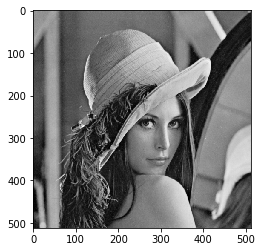

In [2]:
lenna = skimage.io.imread(
    "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png", as_gray=True).astype(np.float32)

plt.imshow(lenna, cmap="gray")


 Create the fields as you regularly do.

In [3]:
x, y = pystencils.fields('x, y:  float32[2d]')

 First, we set the coordinate center of x and y to the center of the fields

In [4]:
x.set_coordinate_origin_to_field_center()
y.set_coordinate_origin_to_field_center()

 Rotate around center when setting coordinates origins to field centers

In [5]:
rotation_angle = sympy.pi / 5
transform_matrix = sympy.rot_axis3(rotation_angle)[:2, :2]

 Generic matrix transform works like that (for rotation it would be more clever to use transform_matrix.T)

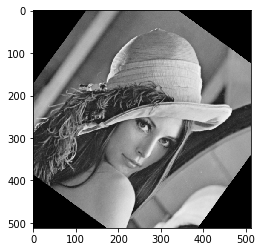

In [6]:
inverse_matrix = transform_matrix.inv()
input_coordinate = x.physical_to_index(inverse_matrix @ y.physical_coordinates)

assignments = pystencils.AssignmentCollection({
    y.center(): LinearInterpolator(x).at(input_coordinate)
})

kernel = pystencils.create_kernel(assignments).compile()
rotated = np.zeros_like(lenna)

kernel(x=lenna, y=rotated)


plt.imshow(rotated, cmap="gray")

 If distance in input field is twice as close, we will see a smaller image

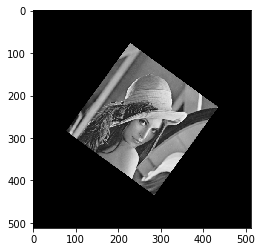

In [7]:
x.coordinate_transform /= 2

input_coordinate = x.physical_to_index(inverse_matrix @ y.physical_coordinates)

assignments = pystencils.AssignmentCollection({
    y.center(): LinearInterpolator(x).at(input_coordinate)
})

kernel = pystencils.create_kernel(assignments).compile()
rotated = np.zeros_like(lenna)

kernel(x=lenna, y=rotated)

plt.imshow(rotated, cmap="gray")

 Conversely, if output field has samples 3 times closer we will see a bigger image

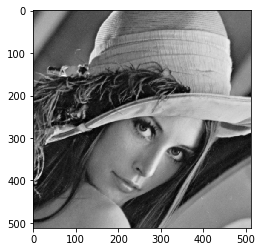

In [8]:
y.coordinate_transform /= 3

input_coordinate = x.physical_to_index(inverse_matrix @ y.physical_coordinates)

assignments = pystencils.AssignmentCollection({
    y.center(): LinearInterpolator(x).at(input_coordinate)
})

kernel = pystencils.create_kernel(assignments).compile()
rotated = np.zeros_like(lenna)

kernel(x=lenna, y=rotated)

plt.imshow(rotated, cmap="gray")
